# Wine Quality Prediction

## Info

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

## **Problem Statement**

Perform `Regression` analysis to estimate Wine Quality

## Data Dictionary

Input variables (based on physicochemical tests):

* 1 - fixed acidity

* 2 - volatile acidity

* 3 - citric acid

* 4 - residual sugar

* 5 - chlorides

* 6 - free sulfur dioxide

* 7 - total sulfur dioxide

* 8 - density

* 9 - pH

* 10 - sulphates

* 11 - alcohol

Target variable (based on sensory data):

* 12 - quality (score between 0 and 10)

## Tools

* Pandas
* NumPy
* Matplotlib
* Seaborn
* Scikit-Learn

# Approach

* Data Analysis
* Data Cleaning
* Experimentation
* Conclusion


In [54]:
# Importing tools
# Import all the tools

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Creating evaluation functions

In [18]:
# Function for computing cross-validated evaluation metrics
def cross_validation_report(model, X_train, y_train, k):
    '''
    This function computes the cross-validated
    Accuracy, Precision, Recall, F1-Score and AUC Score
    of a given model, accross k folds.
    '''
    
    cross_acc = cross_val_score(model, X_train, y_train, cv=k, scoring="accuracy")
    cross_prec = cross_val_score(model, X_train, y_train, cv=k, scoring="precision")
    cross_recall = cross_val_score(model, X_train, y_train, cv=k, scoring="recall")
    cross_f1 = cross_val_score(model, X_train, y_train, cv=k, scoring="f1")
    cross_auc = cross_val_score(model, X_train, y_train, cv=k, scoring="roc_auc")
    
    metrics = {"Accuracy": cross_acc.mean(),
               "Precision": cross_prec.mean(),
               "Recall": cross_recall.mean(),
               "F1 Score": cross_f1.mean(),
               "AUC Score": cross_auc.mean()}
    return metrics


def plot_confusion_matrix(y_test, y_preds, colormap):
    '''
    This function plots a Confusion Matrix using
    Seaborn's heatmap.
    '''
    sns.set(font_scale=1.2)
    log_reg_conf = confusion_matrix(y_test, y_preds)
    sns.heatmap(log_reg_conf, annot=True, fmt='d', linewidths=.5,  
                cmap="Reds", cbar=False)
    plt.ylabel('true label')
    plt.xlabel('predicted label');
    

def plot_corr_matrix(data, color):
    '''
    This function plots a correlation matrix for an input
    DataFrame with Seaborn's heatmap
    '''
    plt.figure(figsize=(12,12))
    sns.set(font_scale=1.2)
    sns.heatmap(data.corr(),cmap=color, annot=True)



# Exploratory Data Analyis

In [3]:
# Import data

df = pd.read_csv("../data/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


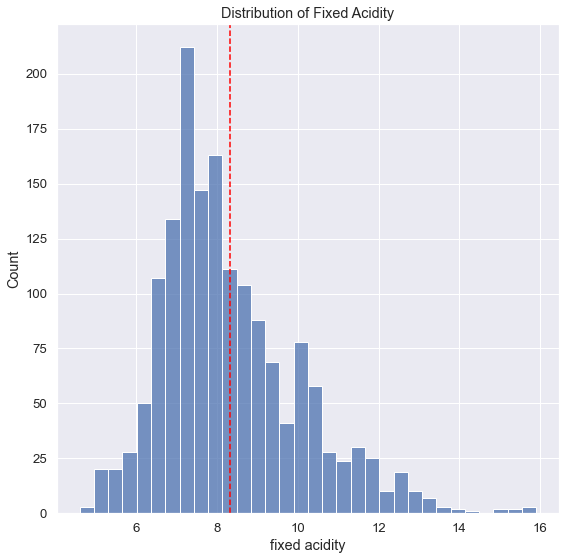

In [32]:
# Plot distribution of fixed acidity

sns.set_theme()
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(9,9))
sns.histplot(ax=ax, data=df, x="fixed acidity")

plt.axvline(df["fixed acidity"].mean(), color='red', linestyle='dashed', linewidth=1.5)
plt.title("Distribution of Fixed Acidity");

In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

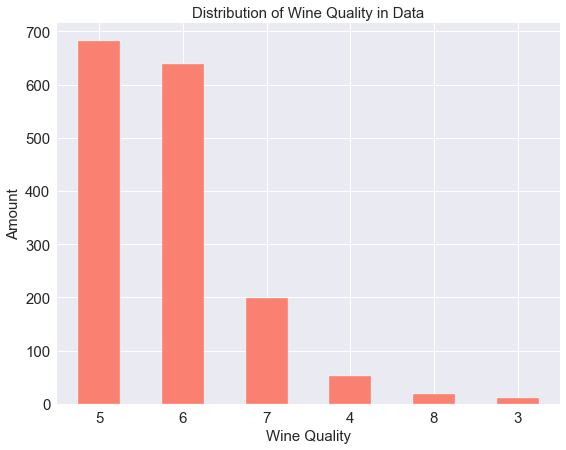

In [53]:
plt.style.use("seaborn")

df.quality.value_counts().plot(kind="bar", color="salmon", fontsize=15, figsize=(9,7))
plt.xticks(rotation=0)
plt.title("Distribution of Wine Quality in Data", fontsize=15)
plt.xlabel("Wine Quality", fontsize=15)
plt.ylabel("Amount", fontsize=15);

In [54]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


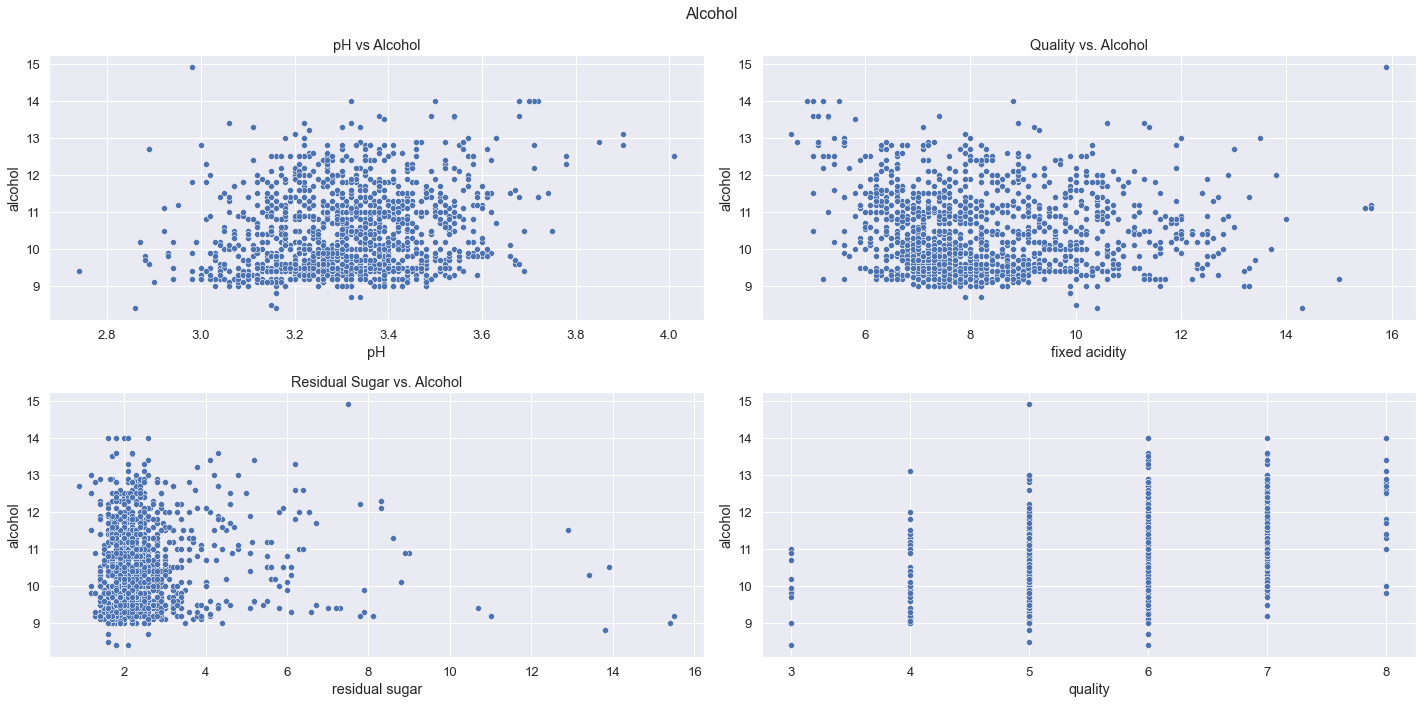

In [8]:
# Visualize relationships between variables with scatterplots

sns.set(font_scale=1.2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

sns.scatterplot(ax=ax1, x="pH", y="alcohol", data=df)
ax1.set(title="pH vs Alcohol")

sns.scatterplot(ax=ax2, x="fixed acidity", y="alcohol", data=df)
ax2.set(title="Fixed Acidity vs. Alcohol")

sns.scatterplot(ax=ax3, x="residual sugar", y="alcohol", data=df)
ax3.set(title="Residual Sugar vs. Alcohol")

sns.scatterplot(ax=ax4, x="quality", y="alcohol", data=df)
ax2.set(title="Quality vs. Alcohol")

fig.fontsize = 15
fig.suptitle("Alcohol", fontsize=16)
fig.tight_layout();

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Examining the correlation between features

In [17]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


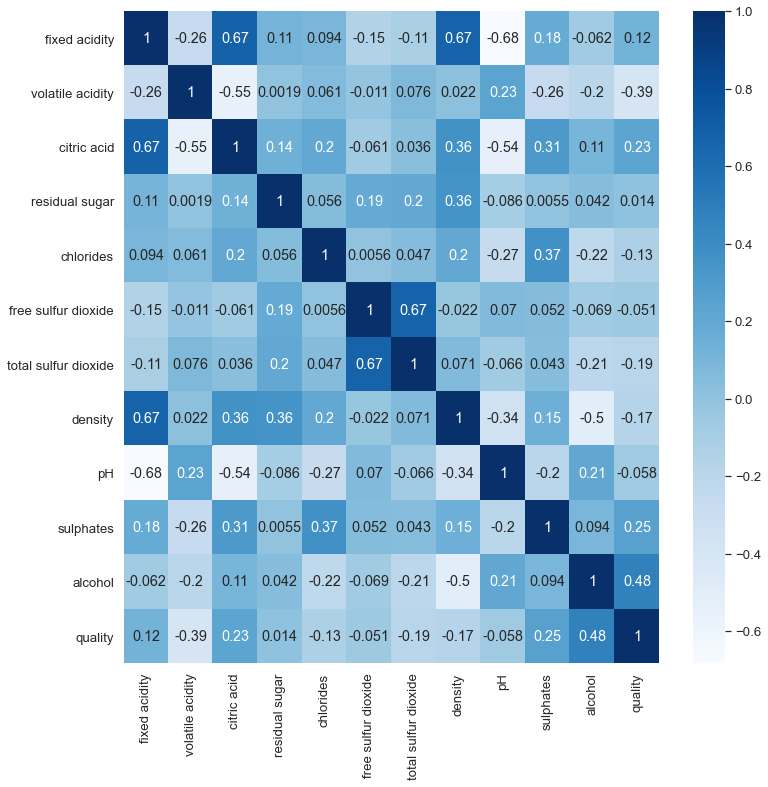

In [19]:
plot_corr_matrix(df, "Blues")

In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


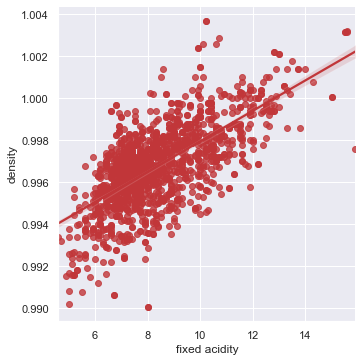

In [50]:
sns.set(style="darkgrid")
sns.set_palette("RdBu")
sns.lmplot(x="fixed acidity", y="density", data=df);

# Experimentation